# 2022 빅콘테스트_spec 데이터 전처리
## 우 걱정마세요

##1. 라이브러리 및 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
user_spec = pd.read_csv('/content/gdrive/MyDrive/BigContest_data/user_spec.csv')
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [4]:
loan_result = pd.read_csv('/content/gdrive/MyDrive/BigContest_data/loan_result.csv')
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


##2. 결측값이 9개 이상인 row 제거

In [5]:
respec = user_spec
drop_application_id = list(set(respec['application_id'])-set(loan_result['application_id']))

In [6]:
respec.drop(respec[respec['application_id'].isin(drop_application_id)].index,inplace=True)

##3. yearly_income 컬럼

In [7]:
respec[respec['yearly_income'].isnull()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaN,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0


In [8]:
respec.loc[respec['yearly_income'].isnull(), 'yearly_income'] = 0

## 4. purpose 컬럼

In [9]:
respec['purpose'].unique()

array(['대환대출', '생활비', '사업자금', '주택구입', '기타', '전월세보증금', '투자', 'LIVING',
       'SWITCHLOAN', 'INVEST', 'ETC', '자동차구입', 'BUSINESS', 'BUYCAR',
       'BUYHOUSE', 'HOUSEDEPOSIT'], dtype=object)

In [10]:
respec['purpose'] = respec['purpose'].replace("기타", 'ETC').replace("대환대출", 'SWITCHLOAN').replace("생활비", 'LIVING').replace("사업자금", "BUSINESS").replace("주택구입", 'BUYHOUSE').replace("전월세보증금", 'HOUSEDEPOSIT').replace("투자", 'INVEST').replace("자동차구입", 'BUYCAR')


In [11]:
respec.groupby(['purpose']).mean()

,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
purpose,,,,,,,,,,,,
BUSINESS,1.082040e+06,436080.991736,1980.804398,0.698343,736.734092,7.175506e+07,4.864794e+06,5.192758e+07,0.008103,0.008750,3.337271,8.653888e+07
BUYCAR,1.075803e+06,440826.914857,1986.361140,0.816823,718.368679,5.349948e+07,1.173165e+06,3.026715e+07,0.021277,0.009009,2.936728,6.913847e+07
BUYHOUSE,1.082496e+06,437198.403768,1983.689622,0.686889,839.353564,5.486352e+07,4.879441e+06,1.733751e+08,0.006312,0.006021,2.457088,9.179131e+07
ETC,1.078635e+06,441458.278679,1981.941380,0.676602,718.921435,4.672088e+07,4.869104e+06,5.021406e+07,0.011778,0.006936,3.812549,7.705330e+07
HOUSEDEPOSIT,1.087113e+06,439804.523258,1986.078409,0.623285,765.769168,4.378604e+07,4.938312e+06,8.817148e+07,0.013667,0.005598,2.613261,5.937304e+07
INVEST,1.091563e+06,438642.723577,1985.219961,0.863343,795.127562,5.700133e+07,4.870698e+06,7.308763e+07,0.003909,0.006652,3.415646,1.008581e+08
LIVING,1.083702e+06,440931.625044,1982.620231,0.672816,661.737925,4.230887e+07,4.854741e+06,2.419012e+07,0.010372,0.005346,4.803647,7.547312e+07
SWITCHLOAN,1.083758e+06,439494.098394,1983.112895,0.673657,666.737587,4.441556e+07,4.981218e+06,4.237108e+07,0.005316,0.003735,4.372232,7.644610e+07


##5. birth_year 컬럼
* birth_year을 나이로 바꿔주었음.
* 나이를 10단위로 바꿔주었고, 70이상의 값은 70으로 처리
* yearly_income을 기준으로 null값을 채움

In [12]:
# 유저 성별이 다른 신청서에는 있지만 결측치가 있는 유저들 처리
gender_null = set(respec[(respec['user_id'].isin(set(respec[respec['gender'].isnull()]['user_id'])))&(respec['gender'].notnull())]['user_id'])

In [13]:
for i in gender_null:
    respec.loc[(respec['user_id']==i)&(respec['birth_year'].isnull()),'birth_year'] = respec[respec['user_id'] == i]['birth_year'].dropna().unique().item()
    respec.loc[(respec['user_id']==i)&(respec['gender'].isnull()),'gender'] = respec[respec['user_id'] == i]['gender'].dropna().unique().item()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


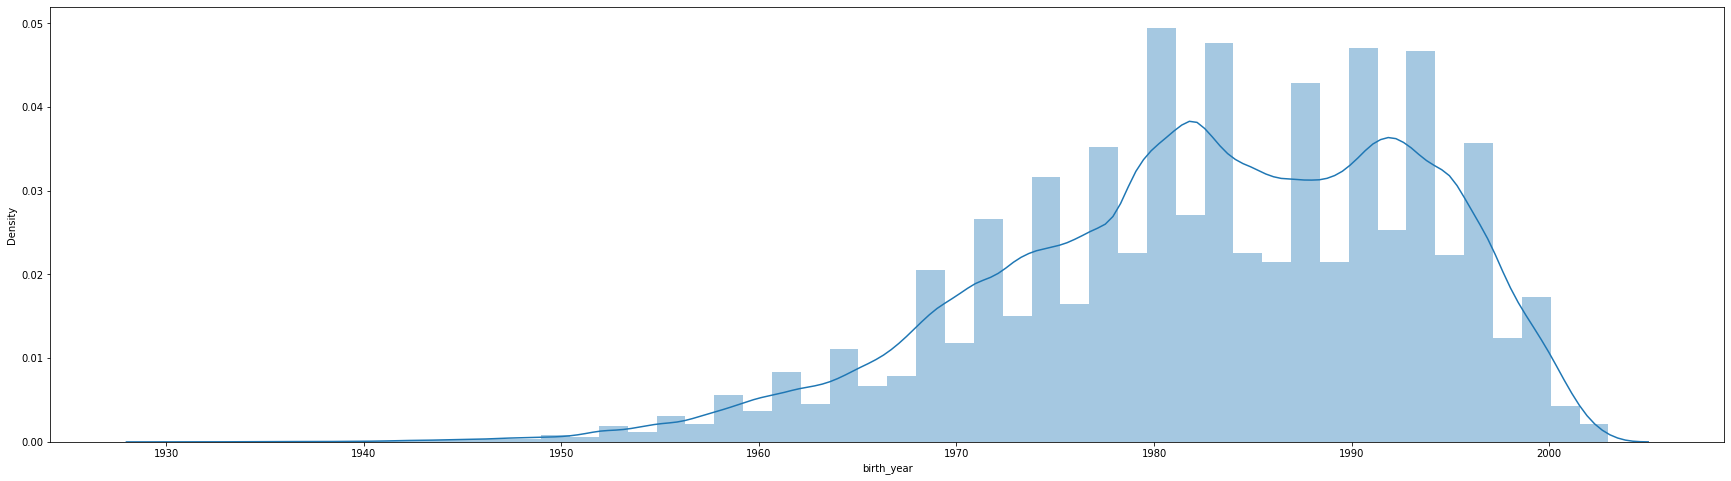

In [14]:
plt.figure(figsize=(30,8))
sns.distplot(respec['birth_year'])
plt.show()

In [15]:
respec['age'] = 2023 - respec['birth_year']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


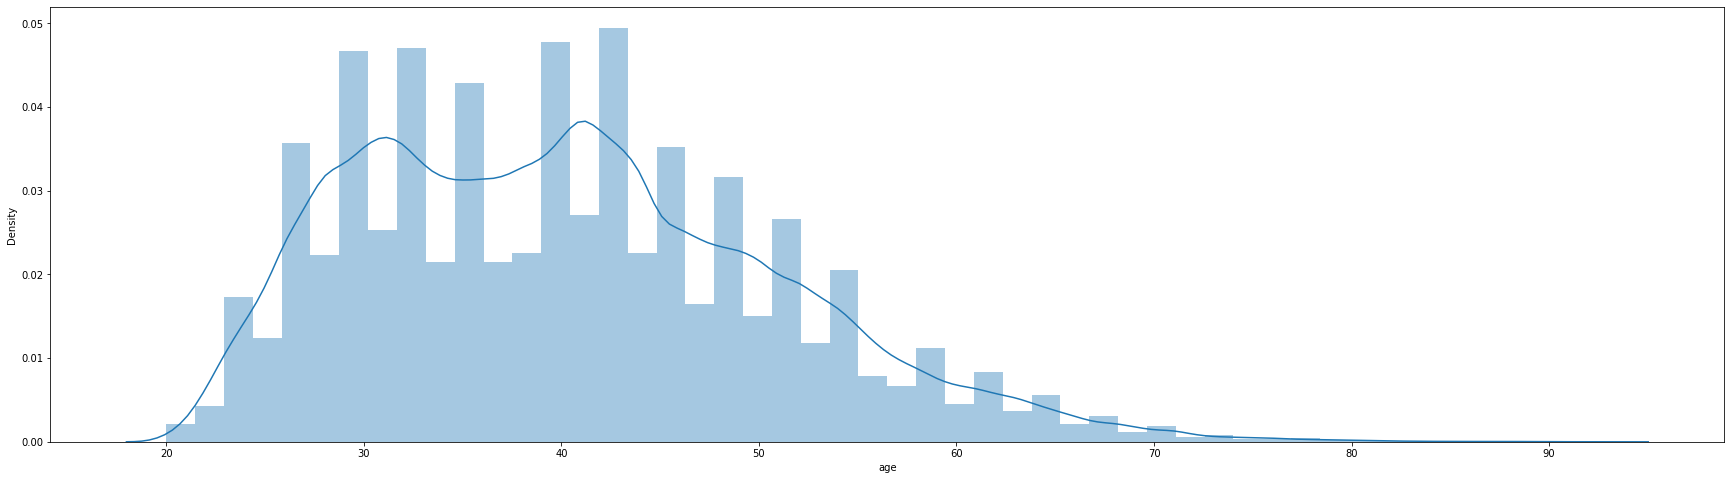

In [16]:
plt.figure(figsize=(30,8))
sns.distplot(respec['age'])
plt.show()

In [17]:
respec.loc[respec['age'] < 20, 'reage'] = 10
respec.loc[(respec['age'] >= 20) & (respec['age'] <30), 'reage'] = 20
respec.loc[(respec['age'] >= 30) & (respec['age'] <40), 'reage'] = 30
respec.loc[(respec['age'] >= 40) & (respec['age'] <50), 'reage'] = 40
respec.loc[(respec['age'] >= 50) & (respec['age'] <60), 'reage'] = 50
respec.loc[(respec['age'] >= 60) & (respec['age'] <70), 'reage'] = 60
respec.loc[respec['age'] >= 70, 'reage'] = 70

In [18]:
respec_group = respec.groupby(['reage']).mean()
respec_group = respec_group.reset_index()

In [19]:
respec_group

,reage,application_id,user_id,birth_year,gender,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age
0,20.0,1.083651e+06,440805.330399,1996.585710,0.697107,659.406853,2.987041e+07,5.010945e+06,2.391264e+07,0.005605,0.001343,3.541547,3.490063e+07,26.414290
1,30.0,1.084868e+06,442264.064696,1988.608223,0.698099,678.562302,4.132548e+07,4.900269e+06,3.755334e+07,0.007445,0.004797,4.370370,7.209901e+07,34.391777
2,40.0,1.081521e+06,437538.707302,1979.051834,0.659310,676.406702,5.027102e+07,4.813463e+06,3.833640e+07,0.010219,0.009421,4.873379,9.474327e+07,43.948166
3,50.0,1.084982e+06,440780.961920,1969.437196,0.659148,672.597414,5.942931e+07,4.795204e+06,3.983855e+07,0.012185,0.017363,4.953073,9.210063e+07,53.562804
4,60.0,1.083795e+06,437324.421057,1959.672892,0.617716,677.869317,4.667257e+07,4.895073e+06,3.666523e+07,0.011416,0.027592,4.722829,6.853000e+07,63.327108
5,70.0,1.094280e+06,447915.803977,1949.029403,0.533665,697.099452,3.630668e+07,5.611722e+06,2.287173e+07,0.006098,0.014493,5.118890,6.087817e+07,73.970597


In [20]:
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] < respec_group[respec_group['reage'] == 20]['yearly_income'].item()), 'reage'] = 10
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= respec_group[respec_group['reage'] == 20]['yearly_income'].item()) & (respec['yearly_income'] < respec_group[respec_group['reage'] == 70]['yearly_income'].item()), 'reage'] = 20
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= respec_group[respec_group['reage'] == 70]['yearly_income'].item()) & (respec['yearly_income'] < respec_group[respec_group['reage'] == 30]['yearly_income'].item()), 'reage'] = 70
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= respec_group[respec_group['reage'] == 30]['yearly_income'].item()) & (respec['yearly_income'] < respec_group[respec_group['reage'] == 60]['yearly_income'].item()), 'reage'] = 30
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= respec_group[respec_group['reage'] == 60]['yearly_income'].item()) & (respec['yearly_income'] < respec_group[respec_group['reage'] == 40]['yearly_income'].item()	), 'reage'] = 60
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= respec_group[respec_group['reage'] == 40]['yearly_income'].item()) & (respec['yearly_income'] < respec_group[respec_group['reage'] == 50]['yearly_income'].item()), 'reage'] = 40
respec.loc[(respec['reage'].isnull()) & (respec['yearly_income'] >= respec_group[respec_group['reage'] == 50]['yearly_income'].item()) , 'reage'] = 50

In [21]:
respec = respec.drop(['birth_year', 'age'], axis = 1)

## 6. gender 컬럼

In [22]:
respec['income_type'].unique()

array(['PRIVATEBUSINESS', 'FREELANCER', 'EARNEDINCOME', 'OTHERINCOME',
       'EARNEDINCOME2', 'PRACTITIONER'], dtype=object)

In [23]:
sample1 = respec[(respec['gender'].notnull()) & (respec['income_type'] == 'PRIVATEBUSINESS')]['gender'].value_counts()

per_0 = sample1[0] / (sample1[1] + sample1[0])
per_0 = (per_0*100).round(0)

In [24]:
# income_type == 1
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > per_0:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'PRIVATEBUSINESS'), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'PRIVATEBUSINESS'), 'gender'] = 0

In [25]:
sample1 = respec[(respec['gender'].notnull()) & (respec['income_type'] == 'FREELANCER')]['gender'].value_counts()

per_0 = sample1[0] / (sample1[1] + sample1[0])
per_0 = (per_0*100).round(0)

In [26]:
# income_type == 2
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > per_0:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'FREELANCER'), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'FREELANCER'), 'gender'] = 0

In [27]:
sample1 = respec[(respec['gender'].notnull()) & (respec['income_type'] == 'EARNEDINCOME')]['gender'].value_counts()

per_0 = sample1[0] / (sample1[1] + sample1[0])
per_0 = (per_0*100).round(0)

In [28]:
# income_type == 3
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > per_0:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'EARNEDINCOME'), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'EARNEDINCOME'), 'gender'] = 0

In [29]:
sample1 = respec[(respec['gender'].notnull()) & (respec['income_type'] == 'OTHERINCOME')]['gender'].value_counts()

per_0 = sample1[0] / (sample1[1] + sample1[0])
per_0 = (per_0*100).round(0)

In [30]:
# income_type == 4
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > per_0:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'OTHERINCOME'), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'OTHERINCOME'), 'gender'] = 0

In [31]:
sample1 = respec[(respec['gender'].notnull()) & (respec['income_type'] == 'EARNEDINCOME2')]['gender'].value_counts()

per_0 = sample1[0] / (sample1[1] + sample1[0])
per_0 = (per_0*100).round(0)

In [32]:
# income_type == 5
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > per_0:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'EARNEDINCOME2'), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'EARNEDINCOME2'), 'gender'] = 0

In [33]:
sample1 = respec[(respec['gender'].notnull()) & (respec['income_type'] == 'PRACTITIONER')]['gender'].value_counts()

per_0 = sample1[0] / (sample1[1] + sample1[0])
per_0 = (per_0*100).round(0)

In [34]:
# income_type == 6
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > per_0:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'PRACTITIONER'), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 'PRACTITIONER'), 'gender'] = 0

In [35]:
respec['gender'] = respec['gender'].astype('str')

## 7. company_enter_month 컬럼

In [36]:
respec.loc[(respec['company_enter_month'] < 10000000),'company_enter_month'] = respec['company_enter_month'] / 100

In [37]:
respec.loc[(respec['company_enter_month'] >= 10000000),'company_enter_month'] = respec['company_enter_month'] / 10000

In [38]:
respec['company_enter_month'] = respec['company_enter_month'].round()

In [39]:
respec.groupby(['reage'])['company_enter_month'].mean()

reage
10.0    2019.929857
20.0    2020.741026
30.0    2019.102214
40.0    2016.921633
50.0    2015.491140
60.0    2016.749222
70.0    2017.085093
Name: company_enter_month, dtype: float64

In [40]:
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] <= 10),'company_enter_month'] = 2020
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 10) & (respec['reage'] <= 20),'company_enter_month'] = 2021
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 20) & (respec['reage'] <= 30),'company_enter_month'] = 2020
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 30) & (respec['reage'] <= 40),'company_enter_month'] = 2017
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 40) & (respec['reage'] <= 50),'company_enter_month'] = 2016
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 50) & (respec['reage'] <= 60),'company_enter_month'] = 2017
respec.loc[(respec['company_enter_month'].isnull()) & (respec['reage'] > 60),'company_enter_month'] = 2018

In [41]:
respec['career'] = 2022 - respec['company_enter_month'] + 1

In [42]:
respec = respec.drop(['company_enter_month'], axis = 1)

## 7. existing_loan_cnt

In [43]:
respec.loc[respec['existing_loan_cnt'].isnull(), 'existing_loan_cnt'] = 0

## 8. existing_loan_amt

In [44]:
respec.loc[(respec['existing_loan_amt'].isnull()) & (respec['existing_loan_cnt']==0), 'existing_loan_amt'] = 0

In [45]:
print(respec['existing_loan_amt'].describe())

count    8.899970e+05
mean     6.385665e+07
std      9.303608e+07
min      0.000000e+00
25%      1.000000e+07
50%      3.700000e+07
75%      7.700000e+07
max      7.512000e+09
Name: existing_loan_amt, dtype: float64


In [46]:
respec.loc[(respec['existing_loan_amt'].isnull()), 'existing_loan_amt'] = (7.700000e+07 + 1.000000e+07) /2

## 9. personal_rehabilitation_yn

In [47]:
pry_400 =respec[respec['credit_score']<=400]
pry_400.head()

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career
392,479935,761774,0.0,2022-03-06 20:09:13,100.0,24000000.0,EARNEDINCOME,정규직,기타가족소유,20000000.0,SWITCHLOAN,NaN,NaN,2.0,42000000.0,50.0,3.0
703,305601,619588,1.0,2022-03-19 15:53:49,250.0,20000000.0,EARNEDINCOME,계약직,전월세,10000000.0,LIVING,NaN,NaN,1.0,15000000.0,40.0,2.0
2761,1984793,829044,0.0,2022-03-30 16:35:13,380.0,24000000.0,EARNEDINCOME,정규직,전월세,20000000.0,LIVING,NaN,NaN,0.0,0.0,30.0,3.0
3885,1682821,363307,1.0,2022-06-07 16:49:01,100.0,30000000.0,EARNEDINCOME,정규직,전월세,10000000.0,LIVING,0.0,NaN,1.0,43500000.0,30.0,3.0
6132,387229,622235,1.0,2022-03-10 12:05:15,100.0,39000000.0,EARNEDINCOME,정규직,기타가족소유,3000000.0,LIVING,NaN,NaN,3.0,15000000.0,30.0,2.0


In [48]:
respec['personal_rehabilitation_yn'] = pry_400['personal_rehabilitation_yn'].fillna(1)

In [49]:
respec['personal_rehabilitation_yn'].isnull().sum()

967268

In [50]:
df=respec[respec['personal_rehabilitation_yn'].isnull()]
df_sample = df.sample(n=569011, random_state=100)
df_sample

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career
723586,663275,759637,1.0,2022-05-30 18:29:37,630.0,60000000.0,EARNEDINCOME,정규직,자가,40000000.0,SWITCHLOAN,NaN,NaN,5.0,177000000.0,50.0,23.0
305647,1851112,17579,1.0,2022-04-22 13:46:35,NaN,30000000.0,OTHERINCOME,기타,기타가족소유,8000000.0,BUSINESS,NaN,0.0,0.0,0.0,20.0,2.0
1077225,570183,766927,0.0,2022-06-09 06:03:48,560.0,27000000.0,EARNEDINCOME,정규직,기타가족소유,3000000.0,LIVING,NaN,0.0,3.0,19000000.0,30.0,1.0
240126,1350577,643191,0.0,2022-04-21 00:49:19,720.0,30000000.0,OTHERINCOME,기타,자가,10000000.0,LIVING,NaN,NaN,2.0,35000000.0,40.0,6.0
798986,1044117,137140,1.0,2022-03-14 09:09:08,NaN,30000000.0,EARNEDINCOME,정규직,전월세,70000000.0,SWITCHLOAN,NaN,NaN,0.0,0.0,30.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285645,495264,764580,1.0,2022-03-20 20:31:12,620.0,32000000.0,EARNEDINCOME,정규직,전월세,32000000.0,LIVING,NaN,NaN,12.0,49000000.0,40.0,7.0
897171,828019,714248,0.0,2022-03-04 20:14:40,NaN,26000000.0,EARNEDINCOME,정규직,기타가족소유,50000000.0,LIVING,NaN,NaN,1.0,43500000.0,30.0,2.0
322668,2013048,551143,1.0,2022-05-10 11:53:02,570.0,33000000.0,EARNEDINCOME,정규직,기타가족소유,3000000.0,LIVING,NaN,NaN,3.0,17000000.0,30.0,1.0
567628,878167,578898,1.0,2022-03-06 08:03:16,700.0,37000000.0,EARNEDINCOME,정규직,기타가족소유,50000000.0,LIVING,NaN,NaN,4.0,128000000.0,40.0,4.0


In [51]:
respec['personal_rehabilitation_yn'] = df_sample['personal_rehabilitation_yn'].fillna(0)

In [52]:
respec['personal_rehabilitation_yn'].isnull().sum()

399742

In [53]:
respec['personal_rehabilitation_yn'] = respec['personal_rehabilitation_yn'].fillna(1)

In [54]:
respec['personal_rehabilitation_yn'].isnull().sum()

0

## 10. personal_rehabilitation_complete_yn

In [55]:
pr_0 = respec['personal_rehabilitation_yn'] == 0
prc_0 = respec['personal_rehabilitation_complete_yn'] == 0

subset = respec[pr_0 & prc_0]
subset

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career
4,967833,33400,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,LIVING,0.0,0.0,1.0,16000000.0,20.0,2.0
9,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,EARNEDINCOME,계약직,기타가족소유,3000000.0,LIVING,0.0,0.0,5.0,19000000.0,20.0,1.0
18,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,EARNEDINCOME2,기타,기타가족소유,3000000.0,LIVING,0.0,0.0,10.0,23000000.0,30.0,2.0
38,1563352,706772,0.0,2022-06-07 23:09:52,640.0,31000000.0,EARNEDINCOME,정규직,전월세,46000000.0,SWITCHLOAN,0.0,0.0,4.0,49000000.0,30.0,3.0
61,1810425,317528,1.0,2022-06-07 10:19:28,620.0,38000000.0,EARNEDINCOME,정규직,전월세,30000000.0,SWITCHLOAN,0.0,0.0,7.0,98000000.0,30.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394047,95446,285641,1.0,2022-06-21 09:00:14,720.0,33000000.0,EARNEDINCOME,정규직,전월세,10000000.0,LIVING,0.0,0.0,12.0,125000000.0,30.0,2.0
1394052,90345,230032,0.0,2022-06-21 15:18:25,620.0,40000000.0,EARNEDINCOME,계약직,전월세,30000000.0,BUYHOUSE,0.0,0.0,6.0,51000000.0,30.0,12.0
1394065,222649,848692,1.0,2022-06-21 16:46:00,650.0,50000000.0,EARNEDINCOME,정규직,자가,5000000.0,LIVING,0.0,0.0,8.0,400000000.0,40.0,8.0
1394073,1485272,688352,1.0,2022-06-21 15:21:22,610.0,25000000.0,EARNEDINCOME,정규직,전월세,20000000.0,SWITCHLOAN,0.0,0.0,1.0,43500000.0,30.0,6.0


In [56]:
subset['personal_rehabilitation_complete_yn'] =subset['personal_rehabilitation_complete_yn'].replace(0, 2)
subset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career
4,967833,33400,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,LIVING,0.0,2.0,1.0,16000000.0,20.0,2.0
9,311143,646289,1.0,2022-06-07 10:17:19,530.0,28000000.0,EARNEDINCOME,계약직,기타가족소유,3000000.0,LIVING,0.0,2.0,5.0,19000000.0,20.0,1.0
18,1903409,168234,0.0,2022-06-07 09:43:20,560.0,12000000.0,EARNEDINCOME2,기타,기타가족소유,3000000.0,LIVING,0.0,2.0,10.0,23000000.0,30.0,2.0
38,1563352,706772,0.0,2022-06-07 23:09:52,640.0,31000000.0,EARNEDINCOME,정규직,전월세,46000000.0,SWITCHLOAN,0.0,2.0,4.0,49000000.0,30.0,3.0
61,1810425,317528,1.0,2022-06-07 10:19:28,620.0,38000000.0,EARNEDINCOME,정규직,전월세,30000000.0,SWITCHLOAN,0.0,2.0,7.0,98000000.0,30.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394047,95446,285641,1.0,2022-06-21 09:00:14,720.0,33000000.0,EARNEDINCOME,정규직,전월세,10000000.0,LIVING,0.0,2.0,12.0,125000000.0,30.0,2.0
1394052,90345,230032,0.0,2022-06-21 15:18:25,620.0,40000000.0,EARNEDINCOME,계약직,전월세,30000000.0,BUYHOUSE,0.0,2.0,6.0,51000000.0,30.0,12.0
1394065,222649,848692,1.0,2022-06-21 16:46:00,650.0,50000000.0,EARNEDINCOME,정규직,자가,5000000.0,LIVING,0.0,2.0,8.0,400000000.0,40.0,8.0
1394073,1485272,688352,1.0,2022-06-21 15:21:22,610.0,25000000.0,EARNEDINCOME,정규직,전월세,20000000.0,SWITCHLOAN,0.0,2.0,1.0,43500000.0,30.0,6.0


In [57]:
pr_1 = respec['personal_rehabilitation_yn'] != 0
prc_1 = respec['personal_rehabilitation_complete_yn'] != 0

subset1 = respec[pr_1 | prc_1]

In [58]:
prcy_600 =respec[respec['credit_score']>=600]
prcy_600.head()

,application_id,user_id,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career
1,954900,553686,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,정규직,기타가족소유,30000000.0,SWITCHLOAN,0.0,NaN,1.0,27000000.0,50.0,16.0
2,137274,59516,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,기타,기타가족소유,10000000.0,LIVING,1.0,NaN,5.0,15000000.0,20.0,2.0
3,1570936,167320,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,정규직,자가,2000000.0,LIVING,1.0,NaN,7.0,344000000.0,30.0,6.0
4,967833,33400,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,정규직,기타가족소유,5000000.0,LIVING,0.0,0.0,1.0,16000000.0,20.0,2.0
7,1146166,588743,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,정규직,기타가족소유,6000000.0,LIVING,1.0,0.0,0.0,0.0,30.0,8.0


In [59]:
respec['personal_rehabilitation_complete_yn'] = prcy_600['personal_rehabilitation_complete_yn'].fillna(1)

In [60]:
respec['personal_rehabilitation_complete_yn'].isnull().sum()

302326

In [61]:
respec['personal_rehabilitation_complete_yn'] = respec['personal_rehabilitation_complete_yn'].fillna(0)

In [62]:
respec['personal_rehabilitation_complete_yn'].isnull().sum()

0

In [63]:
respec.isnull().sum()

application_id                             0
user_id                                    0
gender                                     0
insert_time                                0
credit_score                           81769
yearly_income                              0
income_type                                0
employment_type                            0
houseown_type                              0
desired_amount                             0
purpose                                    0
personal_rehabilitation_yn                 0
personal_rehabilitation_complete_yn        0
existing_loan_cnt                          0
existing_loan_amt                          0
reage                                      0
career                                     0
dtype: int64

In [64]:
respec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968753 entries, 1 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   application_id                       968753 non-null  int64  
 1   user_id                              968753 non-null  int64  
 2   gender                               968753 non-null  object 
 3   insert_time                          968753 non-null  object 
 4   credit_score                         886984 non-null  float64
 5   yearly_income                        968753 non-null  float64
 6   income_type                          968753 non-null  object 
 7   employment_type                      968753 non-null  object 
 8   houseown_type                        968753 non-null  object 
 9   desired_amount                       968753 non-null  float64
 10  purpose                              968753 non-null  object 
 11  personal_reh

In [65]:
respec.to_csv("respec.csv", index = False)